In [483]:
import numpy as np
from numpy import sqrt
import matplotlib.pyplot as plt
import pandas as pd
import scipy.constants as const
from scipy.optimize import curve_fit                        # Funktionsfit:     popt, pcov = curve_fit(func, xdata, ydata) 
from uncertainties import ufloat                            # Fehler:           fehlerwert =  ulfaot(x, err)
from uncertainties import unumpy as unp 
from uncertainties.unumpy import uarray                     # Array von Fehler: fehlerarray =  uarray(array, errarray)
from uncertainties.unumpy import (nominal_values as noms,   # Wert:             noms(fehlerwert) = x
                                  std_devs as stds)         # Abweichung:       stds(fehlerarray) = errarray

Tabelle erstellen:

In [484]:
md = pd.read_csv('tables/md.csv')
#md1 = md.iloc[:, [0,1]]
print(md.to_latex(index = False, column_format= "c c", decimal=',')) 

\begin{tabular}{c c}
\toprule
 U/V &     n &  I/mikroA \\
\midrule
 330 & 11649 &      0,20 \\
 340 & 11928 &      0,20 \\
 350 & 12322 &      0,20 \\
 360 & 12488 &      0,21 \\
 370 & 12538 &      0,21 \\
 380 & 12482 &      0,20 \\
 390 & 12726 &      0,25 \\
 400 & 12510 &      0,35 \\
 410 & 12494 &      0,40 \\
 420 & 12678 &      0,40 \\
 430 & 12718 &      0,40 \\
 440 & 12487 &      0,41 \\
 450 & 12825 &      0,50 \\
 460 & 12824 &      0,55 \\
 470 & 12850 &      0,55 \\
 480 & 12862 &      0,60 \\
 490 & 12962 &      0,60 \\
 500 & 12882 &      0,60 \\
 510 & 12815 &      0,61 \\
 520 & 12954 &      0,62 \\
 530 & 12922 &      0,65 \\
 540 & 12996 &      0,70 \\
 550 & 12914 &      0,75 \\
 560 & 12854 &      0,75 \\
 570 & 12916 &      0,80 \\
 580 & 12931 &      0,80 \\
 590 & 13047 &      0,90 \\
 600 & 13003 &      0,90 \\
 610 & 12837 &      0,95 \\
 620 & 12718 &      0,95 \\
 630 & 13000 &      1,00 \\
 640 & 12967 &      1,00 \\
 650 & 13132 &      1,00 \\
 660 & 13

#### Aufgabenteil a)

Daten auswerten:

In [485]:
np.savetxt('tables/a.txt', md1.values, header='U/V N', fmt='%.3f')
U, N = np.genfromtxt('tables/a.txt', unpack=True, skip_header=1)
# Plateaubereich 380 - 620 V
Up = U[5:30]
Np = N[5:30]
Np = Np/120

# Ausgleichsgerade
def g(u, a, b):
    return a * u + b

para, pcov = curve_fit(g, Up, Np)
a, b = para
pcov = sqrt(np.diag(pcov))
fa, fb = pcov 

Fehler berechnen:

In [486]:
ua = ufloat(a, fa)
ub = ufloat(b, fb)
print('a = (%.3f ± %.3f)' % (noms(ua), stds(ua)))
print('b = (%.3f ± %.3f)' % (noms(ub), stds(ub)))

a = (0.013 ± 0.003)
b = (100.018 ± 1.417)


Plot erstellen:

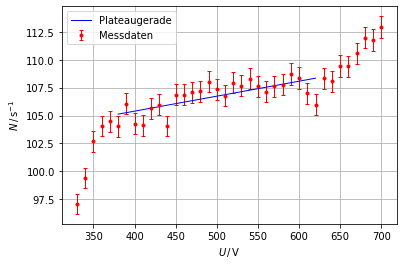

In [487]:
xx = np.linspace(380, 620, 10000)   # Spannungen für das Plateau-Gebiet
fN = sqrt(N)                        # N Poisson-verteilt
uN = uarray(N, fN)
uN = uN/120                         # Impulsrate mit Fehler
plt.errorbar(U, noms(uN), yerr = stds(uN), fmt='r.', elinewidth = 1, capsize = 2, label = 'Messdaten')
plt.plot(xx, g(xx, a, b), '-b', linewidth = 1, label = 'Plateaugerade')

plt.xlabel(r'$U \, / \, \mathrm{V}$')
plt.ylabel(r'$N \, / \, \mathrm{s^{-1}}$')
plt.legend(loc="best")                  # legend position
plt.grid(True)                          # grid style

Güte des Geiger-Müller-Zählrohrs in % pro 100 V:

In [488]:
M = (1 - (ua * 400 + ub)/(ua * 500 + ub))*100
print('M = (%.3f ± %.3f)' % (noms(M), stds(M)))

M = (1.259 ± 0.247)


#### Aufgabenteil b)

In [489]:
# Peak zu Peak ablesen
T_nach = 5.8 * 50
print('T_Nachentladung =', T_nach, 'μs') 

T_Nachentladung = 290.0 μs


#### Aufgabenteil c)
Bestimmung der Tot-Zeit (Zwei-Quellen-Methode):

In [490]:
def T(n1, n2, n12):
    return (n1 + n2 - n12)/(2*n1*n2)

# Zählraten und Poissonfehler der Quellen
t = 120      # Integrationszeit ind s

N1 = 1334
fN1 = sqrt(N1)
uN1 = ufloat(N1, fN1)
uN1 = uN1/t
print('N1 = (%.3f ± %.3f)' % (N1, fN1))

N2 = 21994
fN2 = sqrt(N2)
uN2 = ufloat(N2, fN2)
uN2 = uN2/t
print('N2 = (%.3f ± %.3f)' % (N2, fN2))

N12 = 23182
fN12 = sqrt(N12)
uN12 = ufloat(N12, fN12)
uN12 = uN12/t
print('N12 = (%.3f ± %.3f)' % (N12, fN12))

# Totzeit berechnen
T = T(uN1, uN2, uN12)
print(T)
print('T_tot =', T*1e6, 'μs')


N1 = (1334.000 ± 36.524)
N2 = (21994.000 ± 148.304)
N12 = (23182.000 ± 152.256)
0.0003+/-0.0004
T_tot = (3+/-4)e+02 μs


Oszilloskop-Methode:

In [491]:
# Peak zu Null ablesen
T_Tot = 4.8 * 50
print('Tot =', T_Tot, 'μs') 

Tot = 240.0 μs


#### Aufgabenteil d)
Freigesetzte Ladungen:

In [492]:
md2 = md.iloc[:, [1, 2]]
np.savetxt('tables/b.txt', md2.values, header='N I/μA', fmt='%.3f')
N, I = np.genfromtxt('tables/b.txt', unpack=True, skip_header=1)
I *= 1e-6
t = 120      # Integrationszeit in s 

# einfallende Teilchen
e = const.elementary_charge
def z(i, n):
    e = const.elementary_charge
    return i/(e*n)

fI = 0.05*1e-6       # Fehler des Stroms in μA
uI = uarray(I, fI)

fN = sqrt(N)
uN = uarray(N, fN)
uN = uN/t

Z = z(uI, uN)
nomZ = z(I, N)


Plot der freigesetzen Ladungen:

[1.00000000e+00 3.14009801e+08]


/home/erich/.local/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


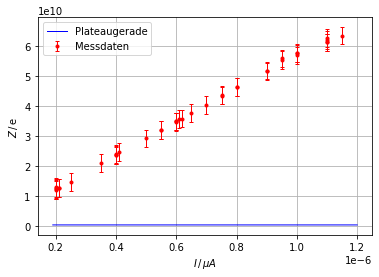

In [533]:
plt.errorbar(I, noms(Z), yerr = stds(Z), fmt='r.', elinewidth = 1, capsize = 2, label = 'Messdaten')

# Ausgleichsgerade
def g(u, a, b):
    return a * u + b

para, pcov = curve_fit(g, I, nomZ)
a, b = para; print(para)
# pcov = sqrt(np.diag(pcov))
# fa, fb = pcov 
xx = np.linspace(0.19*1e-6, 1.2*1e-6, 10000)
# xx = np.linspace(0.19, 1.2, 10000)
plt.plot(xx, g(xx, a, b), '-b', linewidth = 1, label = 'Plateaugerade')

plt.xlabel(r'$I \, / \, \mu A$')
plt.ylabel(r'$Z \, / \, \mathrm{e}$')
plt.legend(loc="best")                  # legend position
plt.grid(True)                          # grid style

In [494]:
f = {'I/μA': uI, 'N': uN, 'Z/e*10**-10': Z*1e-10}
df = pd.DataFrame(data = f)

df = df.iloc[[2, 7, 11, 12, 16, 21, 25, 27, 32, 37],:]
print(df.to_latex(index = False, column_format= "c c c", decimal=','))

\begin{tabular}{c c c}
\toprule
             I/μA &           N & Z/e*10**-10 \\
\midrule
  (2.0+/-0.5)e-07 & 102.7+/-0.9 & 1.22+/-0.30 \\
  (3.5+/-0.5)e-07 & 104.2+/-0.9 & 2.10+/-0.30 \\
  (4.1+/-0.5)e-07 & 104.1+/-0.9 & 2.46+/-0.30 \\
  (5.0+/-0.5)e-07 & 106.9+/-0.9 & 2.92+/-0.29 \\
  (6.0+/-0.5)e-07 & 108.0+/-0.9 & 3.47+/-0.29 \\
  (7.0+/-0.5)e-07 & 108.3+/-1.0 & 4.03+/-0.29 \\
  (8.0+/-0.5)e-07 & 107.8+/-0.9 & 4.63+/-0.29 \\
  (9.0+/-0.5)e-07 & 108.4+/-1.0 & 5.18+/-0.29 \\
(1.00+/-0.05)e-06 & 109.4+/-1.0 & 5.70+/-0.29 \\
(1.15+/-0.05)e-06 & 112.9+/-1.0 & 6.36+/-0.28 \\
\bottomrule
\end{tabular}

